<a href="https://colab.research.google.com/github/Nyawira12/KNN-and-Naive-Bayes-Classification/blob/main/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM DETECTION**

# 1. Defining the Question

## a) Specifying the Data Analytic Question

> You are tasked with identifying whether or not an emial should be classified as spam based on the contents, using a Naive Bayes Classifier. 

## b) Defining the Metric for Success

- The accuracy score.
- The confusion matrix

## c) Understanding the context 

The "spam" concept is diverse: advertisements for productsor web sites, make money fast schemes, chain letters to mention a few. The following is a breakdown of the information in the dataset: 

- The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

- 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

- 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

- 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

- 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

- 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

- 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

## d) Recording the Experimental Design

The steps taken in this analysis are:

1. Importing relevant libraries and reading the dataset.
2. Cleaning the dataset.
3. Exploratory Data Analysis.
4. Implementing the solution.
4. Challenging the solution and conclusion. 

## e) Data Relevance


The collection of spam e-mails came from the postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails which are  are useful when constructing a personalized spam filter. The data is therefore relevant for the analysis. 

# 2. Reading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the Data from the source i.e. csv

Spam = pd.read_csv('/content/spambase_csv.csv')




# 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
Spam.shape

(4601, 58)

In [ ]:
# Previewing the top of our dataset
Spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset
Spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Checking whether each column has an appropriate datatype
Spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [ ]:
Spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [ ]:
Spam.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [ ]:
Spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
Spam.duplicated().sum()

391

In [ ]:
Spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# 4. External Data Source Validation

The data was collected from a machine learning repository and contains real life cases that have been validated. The link is provided : https://archive.ics.uci.edu/ml/datasets/Spambase

# 5. Tidying the Dataset

The number of columns would make visual alternatives in detecting outliers time consuming, we shall then use the Interquartile Range (IQR).

In [ ]:
Q1 = Spam.quantile(0.25)
Q3 = Spam.quantile(0.75)
IQR = Q3- Q1

print(IQR)

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

In [ ]:
print([(Spam < (Q1 - 1.5 * IQR)) |(Spam > (Q3 + 1.5 * IQR))])

[      word_freq_make  word_freq_address  ...  capital_run_length_total  class
0              False               True  ...                     False  False
1               True               True  ...                      True  False
2               True              False  ...                      True  False
3              False              False  ...                     False  False
4              False              False  ...                     False  False
...              ...                ...  ...                       ...    ...
4596            True              False  ...                     False  False
4597           False              False  ...                     False  False
4598            True              False  ...                     False  False
4599            True              False  ...                     False  False
4600           False              False  ...                     False  False

[4601 rows x 58 columns]]


In [ ]:
Spam_df = Spam[((Spam < (Q1 - 1.5 * IQR)) |(Spam > (Q3 + 1.5 * IQR))).any(axis=1)]
Spam_df.shape

(4424, 58)

Using the IQR, we assume that values that fall outside the prescribed range could be defined as outliers and hence dropped from the dataset. Given that the number of outliers is relatively low, with the number of rows reducing to 4424 from 4601 we can proceed drop them. 
We shall however keep the duplicates as the nature of data collected may warrant their inclusion in overall analysis. 

# 6. Exploratory Analysis

## a)  Univariate Analysis

In [ ]:
Spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.108736,0.221537,0.291600,0.068042,0.323569,0.099738,0.118777,0.109507,0.093671,0.248992,0.062217,0.559157,0.097688,0.060972,0.051173,0.258804,0.148291,0.192136,1.694152,0.089001,0.834864,0.126051,0.105712,0.098040,0.571490,0.276001,0.798004,0.129840,0.102873,0.106967,0.067344,0.048931,0.101119,0.049749,0.109629,0.101377,0.142432,0.013730,0.081774,0.067428,0.045414,0.137633,0.047943,0.082364,0.313275,0.187019,0.005662,0.033144,0.040118,0.143955,0.017655,0.277516,0.078818,0.046008,5.330994,54.049277,293.851944,0.404837
std,0.310676,1.315427,0.510914,1.422731,0.682724,0.278563,0.398516,0.408453,0.283541,0.655713,0.205175,0.870859,0.306402,0.341615,0.263781,0.840621,0.451918,0.540333,1.772832,0.519574,1.211969,1.045786,0.356624,0.450996,1.700773,0.902907,3.430438,0.548656,0.604745,0.465257,0.411173,0.334931,0.566574,0.335831,0.542379,0.410118,0.430936,0.225006,0.442994,0.356604,0.368253,0.781546,0.228052,0.634093,1.029900,0.928446,0.077778,0.291323,0.248170,0.274246,0.111508,0.829980,0.250278,0.437756,32.349699,198.516845,615.981265,0.490916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625000,7.000000,39.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

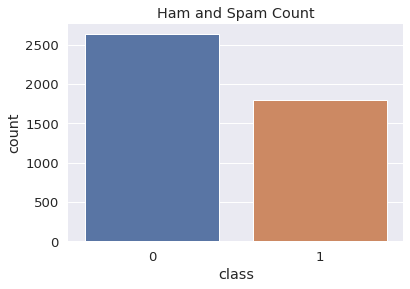

In [ ]:
sns.countplot(x='class', data=Spam_df)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Ham and Spam Count')
plt.show()

In [ ]:
word_frequency = Spam_df.iloc[:, :-4]

word_frequency = word_frequency.append(word_frequency.sum(numeric_only=True), ignore_index=True)
totals = pd.DataFrame(word_frequency.iloc[4424, :])
totals.columns = ['Totals']

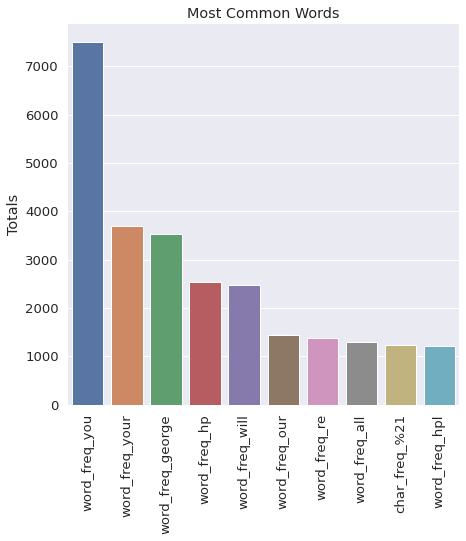

In [ ]:
totals = totals.sort_values(by='Totals', ascending=False)
top = totals.head(10)
top_10 = totals.head(10).index
plt.figure(figsize=(7,7))
sns.barplot(y='Totals', x=top_10, data=top)
plt.xticks(rotation=90)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Most Common Words')
plt.show()

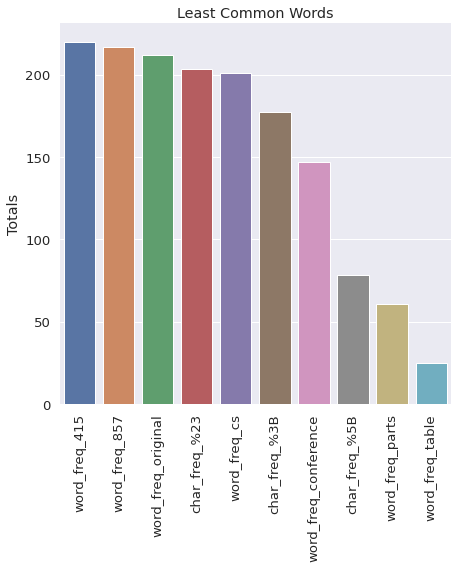

In [ ]:
bottom = totals.tail(10)
bottom_10 = totals.tail(10).index
plt.figure(figsize=(7,7))
sns.barplot(y='Totals', x=bottom_10, data=bottom)
plt.xticks(rotation=90)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Least Common Words')
plt.show()

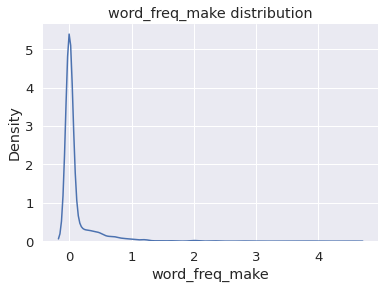

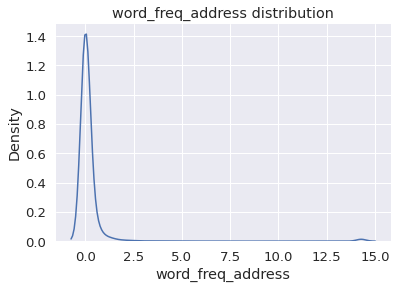

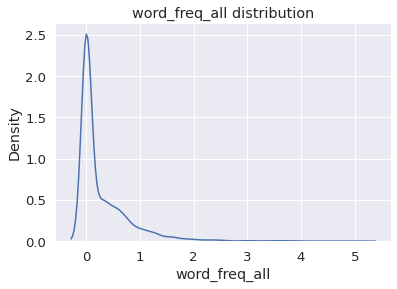

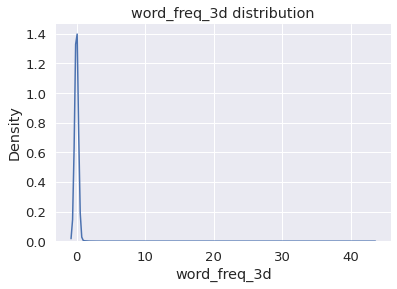

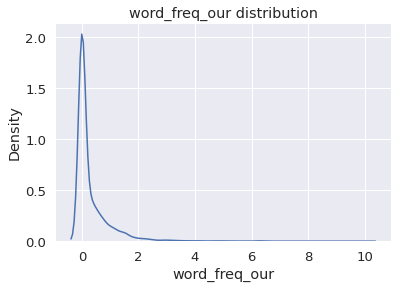

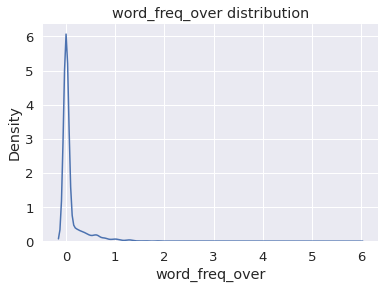

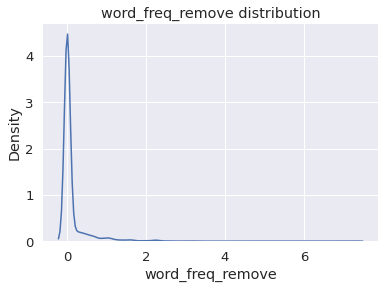

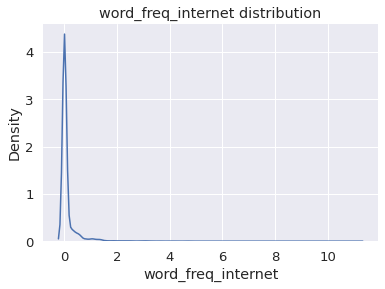

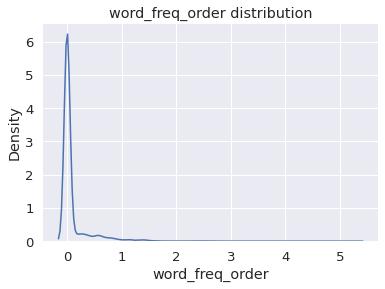

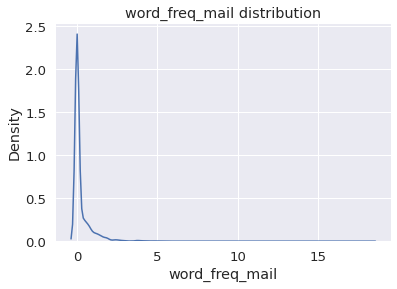

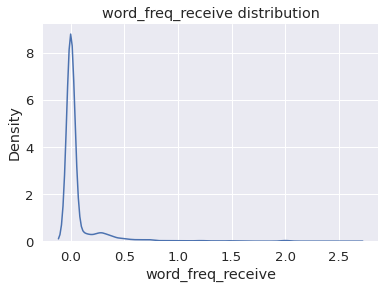

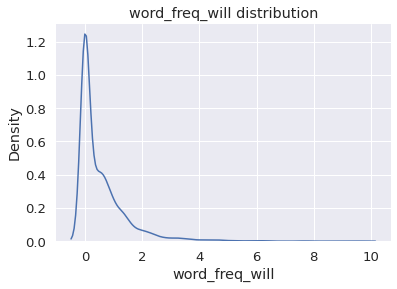

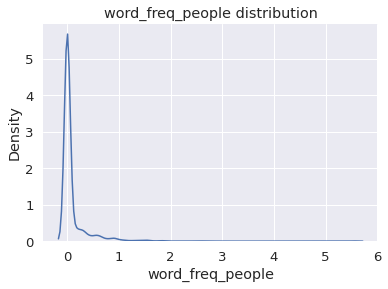

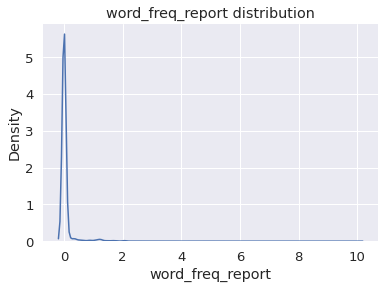

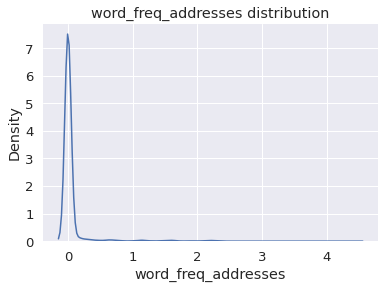

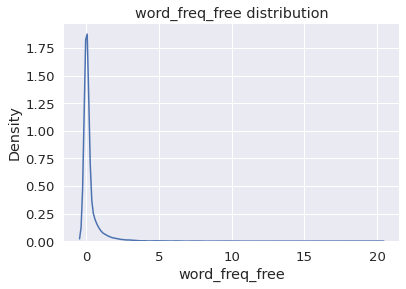

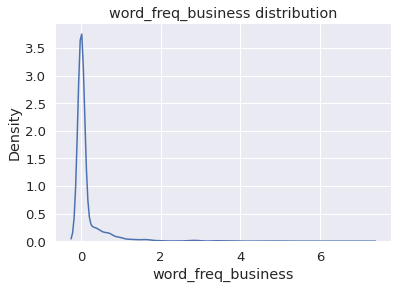

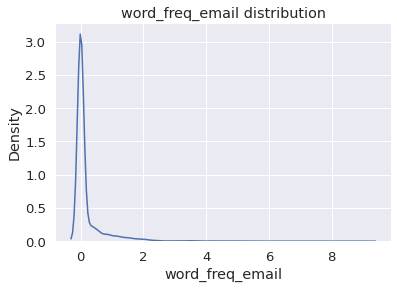

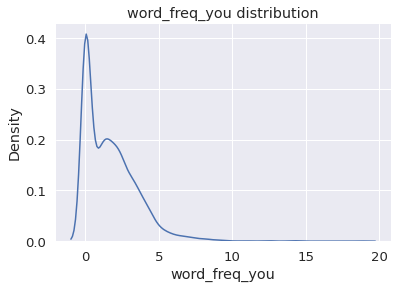

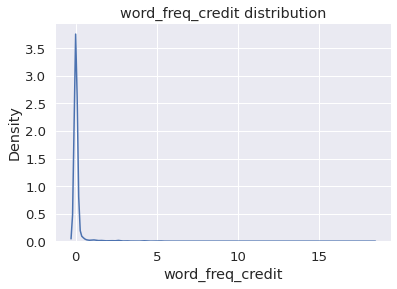

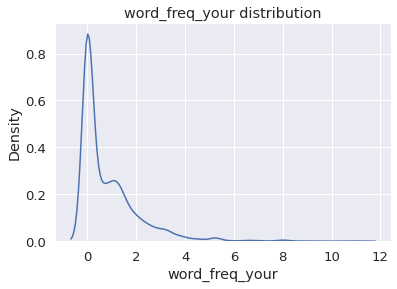

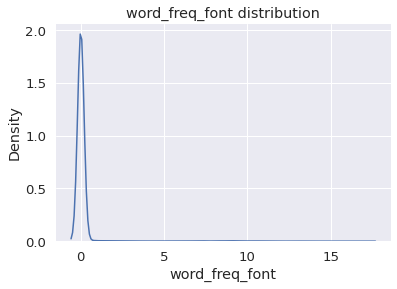

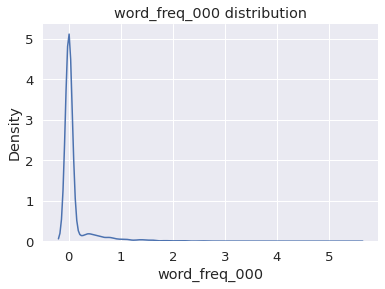

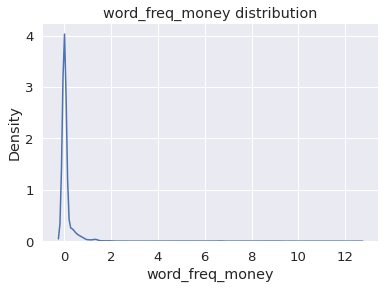

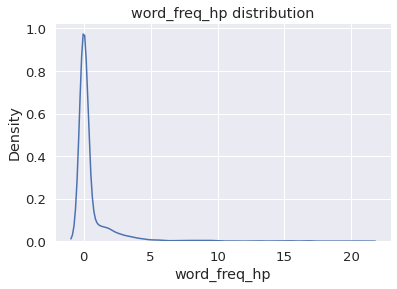

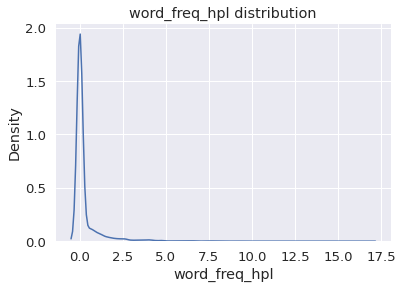

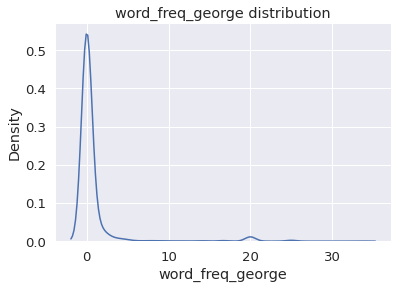

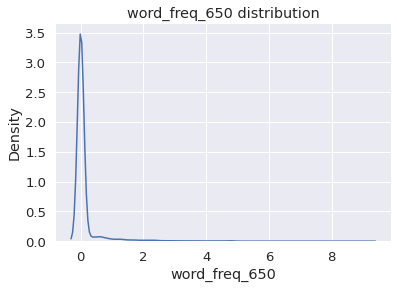

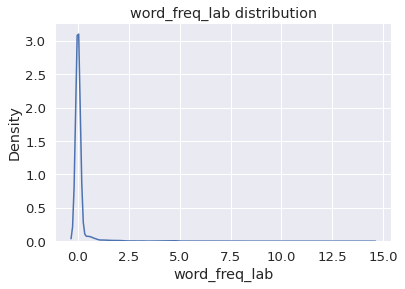

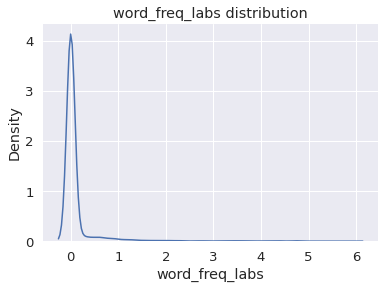

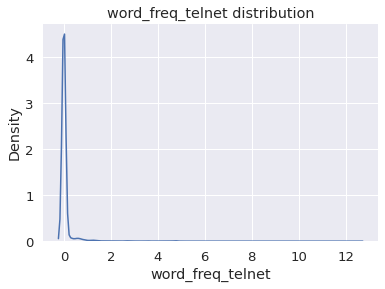

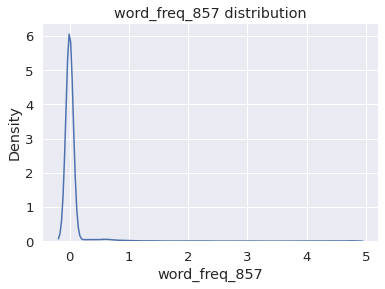

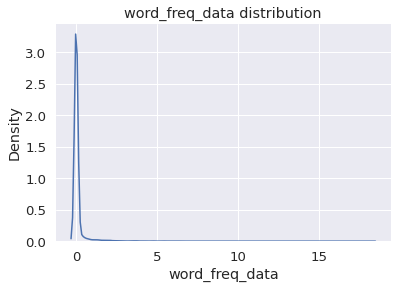

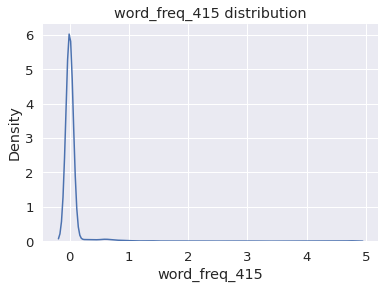

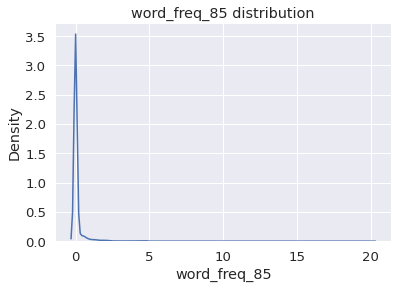

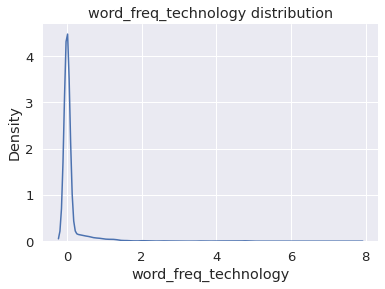

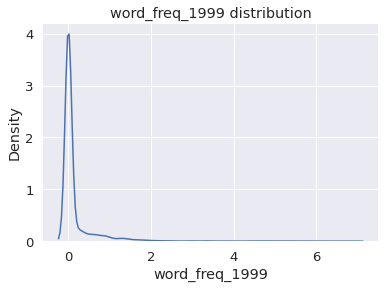

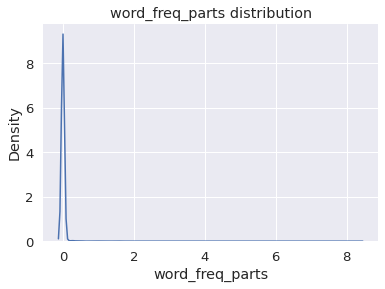

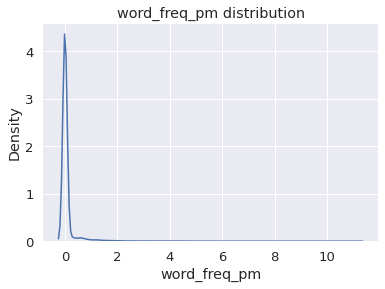

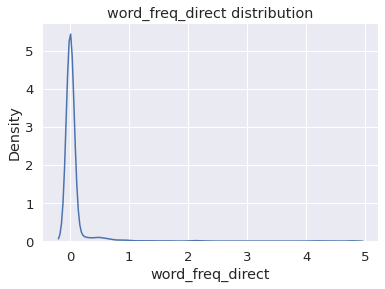

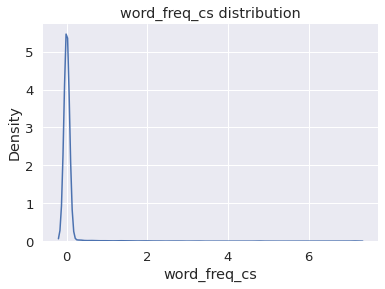

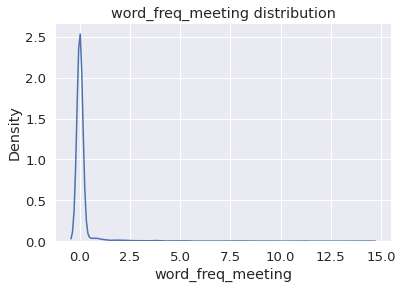

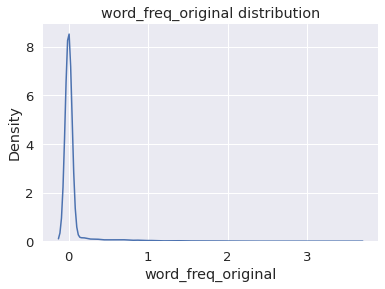

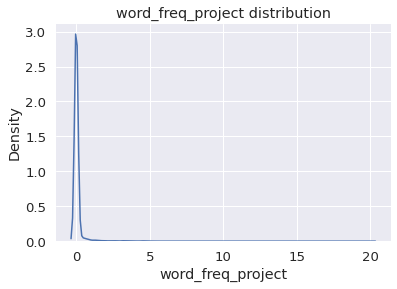

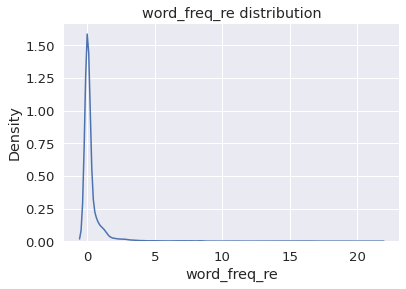

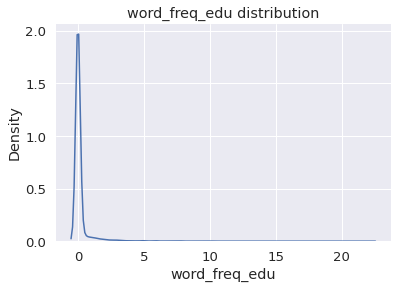

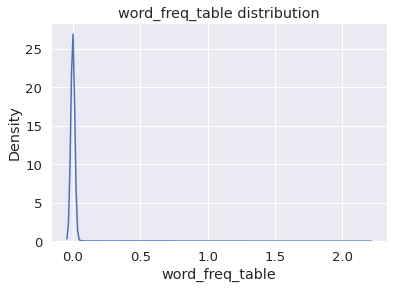

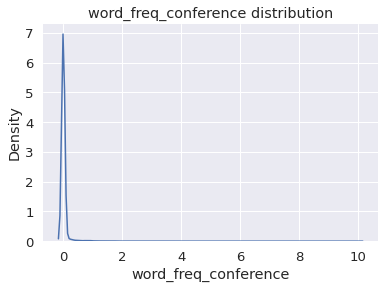

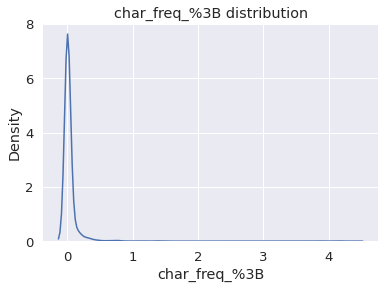

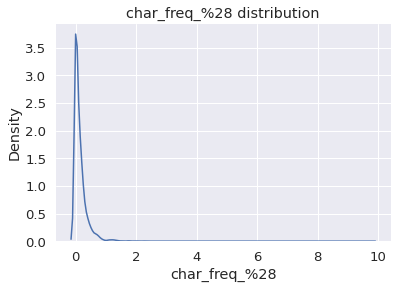

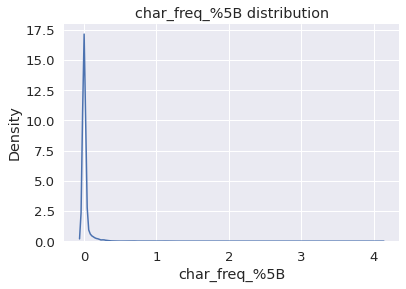

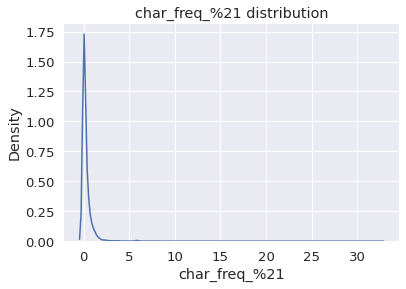

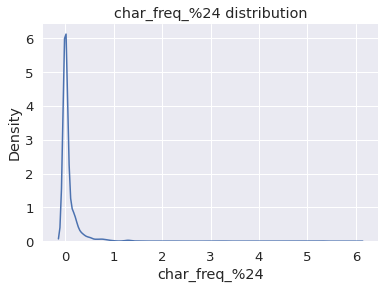

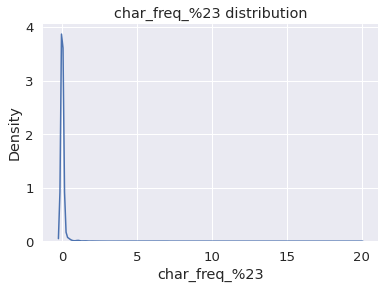

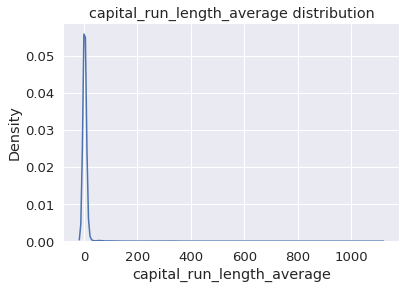

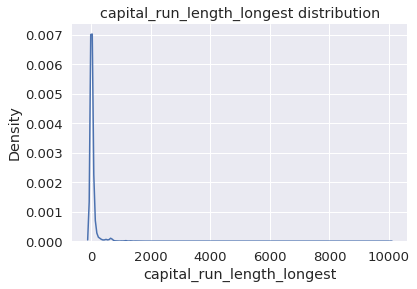

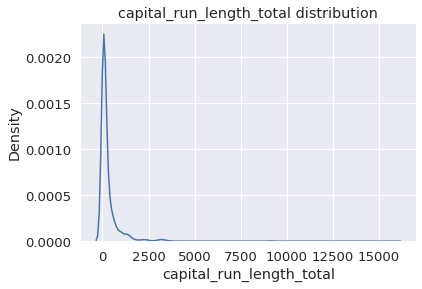

In [ ]:
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']
for col in columns:
  sns.distplot(Spam_df[col], kde=True, hist=False)
  dist_title = col + ' distribution'
  plt.title(dist_title)
  sns.despine(left=True, bottom=True)
  plt.show()

In [ ]:
from scipy.stats import shapiro

for i in Spam_df.columns:
  stat, p = shapiro(Spam_df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian') 

Statistics=0.396, p=0.000
Statistics=0.144, p=0.000
Statistics=0.631, p=0.000
Statistics=0.023, p=0.000
Statistics=0.524, p=0.000
Statistics=0.407, p=0.000
Statistics=0.332, p=0.000
Statistics=0.284, p=0.000
Statistics=0.379, p=0.000
Statistics=0.413, p=0.000
Statistics=0.342, p=0.000
Statistics=0.677, p=0.000
Statistics=0.355, p=0.000
Statistics=0.173, p=0.000
Statistics=0.197, p=0.000
Statistics=0.316, p=0.000
Statistics=0.370, p=0.000
Statistics=0.406, p=0.000
Statistics=0.852, p=0.000
Statistics=0.161, p=0.000
Statistics=0.719, p=0.000
Statistics=0.100, p=0.000
Statistics=0.335, p=0.000
Statistics=0.202, p=0.000
Statistics=0.376, p=0.000
Statistics=0.343, p=0.000
Statistics=0.242, p=0.000
Statistics=0.256, p=0.000
Statistics=0.161, p=0.000
Statistics=0.245, p=0.000
Statistics=0.153, p=0.000
Statistics=0.131, p=0.000
Statistics=0.171, p=0.000
Statistics=0.134, p=0.000
Statistics=0.198, p=0.000
Statistics=0.264, p=0.000
Statistics=0.378, p=0.000
Statistics=0.034, p=0.000
Statistics=0

The univariate analysis reveals that the data is heavily skewed and not normally distributed which may warrant normalizing or standardization when perfroming analysis. 

## b) Bivariate Analysis

<Figure size 1440x1224 with 0 Axes>

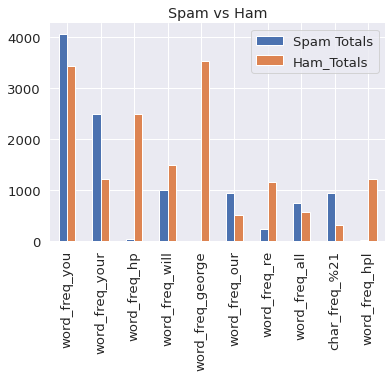

In [ ]:
Spam1 =  Spam_df.groupby(by='class').get_group(1)
Ham1 = Spam_df.groupby(by='class').get_group(0)

# Focusing on the top 10 most common words
Ham_word_freqs = Ham1[['word_freq_you', 'word_freq_your', 'word_freq_hp', 'word_freq_will',
       'word_freq_george', 'word_freq_our', 'word_freq_re', 'word_freq_all',
       'char_freq_%21', 'word_freq_hpl']]
Spam_word_freqs = Spam1[['word_freq_you', 'word_freq_your', 'word_freq_hp', 'word_freq_will',
       'word_freq_george', 'word_freq_our', 'word_freq_re', 'word_freq_all',
       'char_freq_%21', 'word_freq_hpl']]

Ham_word_freqs = Ham_word_freqs.append(Ham_word_freqs.sum(numeric_only=True), ignore_index=True)
Ham_totals = pd.DataFrame(Ham_word_freqs.iloc[-1, :])
Ham_totals.columns = ['Ham_Totals']

Spam_word_freqs = Spam_word_freqs.append(Spam_word_freqs.sum(numeric_only=True), ignore_index=True)
Spam_totals = pd.DataFrame(Spam_word_freqs.iloc[-1, :])
Spam_totals.columns = ['Spam Totals']


Grouped_totals = pd.concat([Spam_totals, Ham_totals], 1)


# Plot grouped bar chart
plt.figure(figsize=(20, 17))
Grouped_totals.plot(kind='bar',stacked=False, title='Spam vs Ham')
plt.xticks(rotation=90)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.show()

In [ ]:
Corrmatrix = Spam_df.corr()
Corrmatrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.019076,0.058697,0.012661,0.017461,0.055140,0.003686,-0.007575,0.102287,0.036295,0.185152,0.099997,0.062431,0.034486,0.025914,0.055488,0.077872,0.048790,0.124958,0.019050,0.192320,-0.026036,0.130623,0.185842,-0.077357,-0.066059,-0.069783,-0.052034,-0.043662,-0.056074,-0.041384,-0.034114,-0.043540,-0.029762,-0.047817,-0.058196,-0.062019,-0.008801,-0.013654,-0.038752,-0.011389,-0.028518,-0.027202,-0.023924,-0.041355,-0.036876,-0.001935,-0.019333,-0.028758,-0.027645,-0.035528,0.054998,0.113713,-0.010283,0.043098,0.058291,0.083717,0.120732
word_freq_address,-0.019076,1.000000,-0.037364,-0.007237,-0.026681,-0.027235,0.001995,-0.018048,-0.005977,0.030610,-0.008845,-0.044163,-0.020971,-0.010374,0.004079,-0.011134,-0.020545,0.031295,-0.059736,-0.016934,-0.021880,-0.009638,-0.022468,0.000578,-0.045779,-0.040282,-0.031862,-0.030802,-0.023066,-0.029041,-0.019178,-0.004276,-0.026088,-0.005267,-0.025400,-0.029849,-0.026218,-0.009323,-0.020343,-0.016065,-0.016232,-0.026347,-0.003736,-0.020597,-0.018427,-0.025195,-0.010296,-0.016496,-0.008337,-0.053155,-0.019572,-0.016215,-0.011653,0.001266,0.001358,-0.001321,-0.025668,-0.034403
word_freq_all,0.058697,-0.037364,1.000000,-0.021399,0.069293,0.080661,0.030585,0.006351,0.087497,0.024231,0.042147,0.073025,0.041155,0.004787,0.118814,0.057830,0.029535,0.115371,0.132350,0.027655,0.147829,-0.038498,0.118309,0.036784,-0.095869,-0.069514,-0.114669,-0.056092,-0.061766,-0.037711,-0.042702,-0.065415,-0.058961,-0.065294,-0.053008,-0.052148,-0.074660,0.031306,-0.018867,-0.051446,-0.033802,-0.009624,-0.049146,-0.056602,-0.057591,-0.061372,0.027967,-0.028954,-0.036902,-0.027025,-0.036737,0.103419,0.081647,-0.005609,0.095625,0.102951,0.061200,0.189140
word_freq_3d,0.012661,-0.007237,-0.021399,1.000000,0.002458,-0.010698,0.019270,0.009789,-0.003068,-0.005660,-0.013558,-0.020356,-0.013812,0.011688,0.002352,0.006879,0.002874,0.018785,-0.011930,-0.005700,0.007271,0.027890,0.010842,0.034994,-0.015833,-0.014296,-0.011124,-0.010815,-0.008115,-0.010910,-0.007835,-0.006988,-0.008409,-0.007005,-0.006499,-0.006978,-0.008386,-0.002781,-0.004945,-0.007997,-0.005899,-0.008424,-0.009663,-0.006174,-0.013540,-0.009559,-0.003483,-0.002134,-0.000889,-0.013296,-0.007443,-0.003632,0.010309,-0.000491,0.005056,0.021656,0.020632,0.057195
word_freq_our,0.017461,-0.026681,0.069293,0.002458,1.000000,0.048482,0.143306,0.025317,0.015471,0.028437,0.063774,0.058814,0.026030,0.000496,0.053249,0.078437,0.138941,0.056870,0.092881,0.028841,0.127555,-0.022309,0.065548,-0.003574,-0.078575,-0.081017,-0.092371,-0.065781,0.029384,-0.056178,-0.045474,-0.029310,-0.035130,-0.029557,-0.053358,-0.053233,-0.078577,0.130403,-0.045332,-0.024697,-0.049785,0.112708,-0.052638,0.013149,-0.047661,-0.081751,-0.028236,-0.034050,-0.035612,-0.054496,-0.029155,0.020993,0.036664,0.000279,0.050957,0.048350,-0.005152,0.235284
word_freq_over,0.055140,-0.027235,0.080661,-0.010698,0.048482,1.000000,0.057312,0.076174,0.113423,0.008739,0.049950,0.002193,0.073581,0.007244,0.170946,0.015709,0.059907,0.073835,0.091308,0.056798,0.100795,0.0063

## c) Multivariate Analysis

In [ ]:
Spam_df.corrwith(Spam_df["class"]).sort_values(ascending=False)

class                         1.000000
word_freq_your                0.375858
word_freq_000                 0.333933
word_freq_remove              0.331189
char_freq_%24                 0.322332
word_freq_you                 0.268708
word_freq_free                0.260934
word_freq_business            0.260543
capital_run_length_total      0.243580
char_freq_%21                 0.239453
word_freq_our                 0.235284
word_freq_receive             0.231848
word_freq_over                0.228849
word_freq_order               0.228301
word_freq_money               0.214816
capital_run_length_longest    0.213869
word_freq_internet            0.204348
word_freq_email               0.199998
word_freq_addresses           0.194759
word_freq_all                 0.189140
word_freq_credit              0.188988
word_freq_mail                0.133116
word_freq_people              0.128201
word_freq_make                0.120732
capital_run_length_average    0.109086
word_freq_font           

In [ ]:
#checking multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = Spam_df.drop(['class'], 1)
X = add_constant(variables)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


const                           6.689367
word_freq_make                  1.131700
word_freq_address               1.042583
word_freq_all                   1.108706
word_freq_3d                    1.008147
word_freq_our                   1.119048
word_freq_over                  1.098862
word_freq_remove                1.124460
word_freq_internet              1.097969
word_freq_order                 1.203195
word_freq_mail                  1.084076
word_freq_receive               1.204879
word_freq_will                  1.119276
word_freq_people                1.089992
word_freq_report                1.054312
word_freq_addresses             1.395456
word_freq_free                  1.070012
word_freq_business              1.195360
word_freq_email                 1.158420
word_freq_you                   1.322576
word_freq_credit                1.087064
word_freq_your                  1.350171
word_freq_font                  1.301910
word_freq_000                   1.338414
word_freq_money 

In [ ]:
Factors = Spam_df.drop(['class'], axis=1)
Label = Spam_df['class']

#Importing Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Creating an instance of LDA
lda = LDA()

lda_= lda.fit(Factors, Label)
lda_Factors = lda_.transform(Factors)

#Displaying the coeficients of the reducted columns
lda_.coef_

array([[-4.95805962e-01, -1.31570161e-01,  3.37286325e-01,
         1.10060850e-01,  7.68287265e-01,  1.08353433e+00,
         1.99882463e+00,  8.72892091e-01,  6.64793398e-01,
         1.29599288e-01,  5.68695628e-01, -2.93960004e-01,
         6.63945208e-02,  3.09418783e-02,  1.86336551e-01,
         6.99436013e-01,  4.90752301e-01,  5.15220417e-01,
         1.18047744e-01,  5.79556788e-01,  4.70368862e-01,
         4.15321395e-01,  1.65482165e+00,  8.68819535e-01,
        -2.35795208e-01, -2.19843685e-01, -1.28039460e-01,
         3.20939260e-02, -6.99643352e-02, -5.00035508e-01,
        -2.18140892e-01,  2.06714610e-01, -4.32124621e-01,
         4.29893997e-01, -3.10212789e-01,  2.05700379e-01,
        -3.51109669e-01, -5.09437143e-01, -1.93049464e-01,
         3.86439433e-01, -9.08773054e-02, -3.69806346e-01,
        -6.22222833e-01, -3.32572243e-01, -3.55533552e-01,
        -3.84643318e-01, -1.91489243e+00, -5.91694895e-01,
        -1.36611384e+00, -6.97943473e-01, -6.48885531e-0

In [ ]:
Factors_class = pd.DataFrame(index=Factors.columns.values, data=lda_.coef_[0].T)
pd.options.display.float_format='{:.8f}'.format 
Factors_class.sort_values(0, ascending=False) 

,0
char_freq_%24,2.21863264
word_freq_remove,1.99882463
word_freq_000,1.65482165
word_freq_over,1.08353433
word_freq_internet,0.87289209
word_freq_money,0.86881953
word_freq_our,0.76828726
word_freq_free,0.69943601
word_freq_order,0.66479340
char_freq_%21,0.63768807


The analysis shows which variables are most relevant in classifying whether or not an email could be classified as spam or ham. We shall not use features with high correlation, furthermore, we shall limit the number to the top twenty most relevant variables. 

# 7. Implementing the Solution

## a) Baseline Model

In [ ]:
# the model will serve as a benchmark for how well others should perform and will be built from the uncleaned dataset. 
X = Spam.drop('class', axis=1).values
y = Spam['class'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
Model = GaussianNB().fit(X_train, y_train)

Pred = Model.predict(X_test)

print("The baseline model's accuracy score is:" , accuracy_score(y_test, Pred))
print('\n')
print("The baseline model's confusion matrix:")
print(confusion_matrix(y_test, Pred))

The baseline model's accuracy score is: 0.8027801911381407


The baseline model's confusion matrix:
[[497 194]
 [ 33 427]]


The model has an 80% accuracy score and significantly higher false positives to negatives (194 vs 33) which is a reltively satisfactory comparison frame. 
We then transform the data and proceed to the next step of analysis. 

In [ ]:
X = Spam_df[['char_freq_%24', 'word_freq_remove', 'word_freq_000', 'word_freq_over',
        'word_freq_internet', 'word_freq_money' , 'word_freq_our' , 'word_freq_free', 
        'word_freq_order', 'char_freq_%21', 'word_freq_credit', 'word_freq_receive', 
        'word_freq_email', 'word_freq_business', 'word_freq_your', 'word_freq_415', 
        'word_freq_font', 'word_freq_direct', 'word_freq_all', 'char_freq_%23']]
y = Spam_df['class']

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train = norm.transform(X_train)

X_test = norm.transform(X_test)

## b) 80 - 20 Split

In [ ]:
#Gaussian model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Gauss = GaussianNB().fit(X_train, y_train)

Gauss_pred = Gauss.predict(X_test)

print("The Gaussian Model accuracy score is:", accuracy_score(y_test, Gauss_pred))
print('\n')
print("The Gaussian Model confusion matrix is:")
print(confusion_matrix(y_test, Gauss_pred))
print('\n')
print("The Gaussian Model classification report is:")
print(classification_report(y_test, Gauss_pred))

The Gaussian Model accuracy score is: 0.8451977401129943


The Gaussian Model confusion matrix is:
[[495  34]
 [103 253]]


The Gaussian Model classification report is:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       529
           1       0.88      0.71      0.79       356

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.84       885



In [ ]:
from sklearn.model_selection import cross_val_score
All_accuracies = cross_val_score(estimator=Gauss, X=X_train, y=y_train, cv=5)
print(All_accuracies)
print('\n')
print('Cross validation scores mean:', All_accuracies.mean())

[0.85451977 0.84745763 0.8460452  0.79096045 0.83168317]


Cross validation scores mean: 0.8341332438328578


In [ ]:
params_GS = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=Gauss, 
                     param_grid=params_GS, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.4s finished


In [ ]:
print(gs_NB.best_params_)

{'var_smoothing': 0.0001}


In [ ]:
gs_NB.best_score_

0.8341332438328578

The score is slightly worse than the first model attempt. We proceed to a multinomial approach as an alternative. 

In [ ]:
# Multinomial 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

MN = MultinomialNB()

MN.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Pred1 = MN.predict(X_test)

print(classification_report(y_test, Pred1))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       529
           1       0.87      0.70      0.77       356

    accuracy                           0.84       885
   macro avg       0.84      0.81      0.82       885
weighted avg       0.84      0.84      0.83       885



In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=MN, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print('\n')
print('Cross validation scores mean:', all_accuracies.mean())

[0.85734463 0.85028249 0.83898305 0.76412429 0.82743989]


Cross validation scores mean: 0.8276348700245328


In [ ]:
grid_param = {
    'alpha': [1], # for laplace smoothing
    'fit_prior': [True, False],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=MN,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)


{'alpha': 1, 'fit_prior': True}


In [ ]:
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       529
           1       0.87      0.70      0.77       356

    accuracy                           0.84       885
   macro avg       0.84      0.81      0.82       885
weighted avg       0.84      0.84      0.83       885



This resulted in a similar performance. We shall proceed to a test with different weights of the train and test classes.

## c) 70 - 30 Split

In [ ]:
#Gaussian Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

model = GaussianNB().fit(X_train, y_train)

predicted = model.predict(X_test)

print("The Gaussian Model accuracy score is:", accuracy_score(y_test, predicted))
print('\n')
print("The Gaussian Model confusion matrix is:")
print(confusion_matrix(y_test, predicted))
print('\n')
print("The Gaussian Model classification report is:")
print(classification_report(y_test, predicted))

The Gaussian Model accuracy score is: 0.8516566265060241


The Gaussian Model confusion matrix is:
[[733  49]
 [148 398]]


The Gaussian Model classification report is:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       782
           1       0.89      0.73      0.80       546

    accuracy                           0.85      1328
   macro avg       0.86      0.83      0.84      1328
weighted avg       0.86      0.85      0.85      1328



In [ ]:
from sklearn.model_selection import cross_val_score
All_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(All_accuracies)
print('\n')
print('Cross validation scores mean:', All_accuracies.mean())

[0.85322581 0.84006462 0.82552504 0.81098546 0.8368336 ]


Cross validation scores mean: 0.8333269060399188


In [ ]:
params_GS = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=Gauss, 
                     param_grid=params_GS, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished


In [ ]:
print(gs_NB.best_params_)

{'var_smoothing': 1.5199110829529332e-05}


In [ ]:
print(gs_NB.best_score_)

0.8333269060399188


In [ ]:
#Multinomial Approach

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, y_train)

predicted = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       769
           1       0.85      0.68      0.75       559

    accuracy                           0.81      1328
   macro avg       0.82      0.79      0.80      1328
weighted avg       0.82      0.81      0.81      1328



In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print('\n')
print('Cross validation scores mean:', all_accuracies.mean())

[0.85645161 0.8174475  0.83360258 0.81098546 0.82067851]


Cross validation scores mean: 0.8278331335661056


In [ ]:
grid_param = {
    'alpha': [1], # for laplace smoothing
    'fit_prior': [True, False],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'alpha': 1, 'fit_prior': True}


In [ ]:
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       769
           1       0.85      0.68      0.75       559

    accuracy                           0.81      1328
   macro avg       0.82      0.79      0.80      1328
weighted avg       0.82      0.81      0.81      1328



Like the previous case, cross validation seemes to have resulted in similar figures. 

##d) 60- 40 Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

Gauss = GaussianNB().fit(X_train, y_train)

Gauss_pred = Gauss.predict(X_test)

print("The Gaussian Model accuracy score is:", accuracy_score(y_test, Gauss_pred))
print('\n')
print("The Gaussian Model confusion matrix is:")
print(confusion_matrix(y_test, Gauss_pred))
print('\n')
print("The Gaussian Model classification report is:")
print(classification_report(y_test, Gauss_pred))

The Gaussian Model accuracy score is: 0.843502824858757


The Gaussian Model confusion matrix is:
[[952  76]
 [201 541]]


The Gaussian Model classification report is:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1028
           1       0.88      0.73      0.80       742

    accuracy                           0.84      1770
   macro avg       0.85      0.83      0.83      1770
weighted avg       0.85      0.84      0.84      1770



In [ ]:
from sklearn.model_selection import cross_val_score
All_accuracies = cross_val_score(estimator=Gauss, X=X_train, y=y_train, cv=5)
print(All_accuracies)
print('\n')
print('Cross validation scores mean:', All_accuracies.mean())

[0.84557439 0.82485876 0.80225989 0.82109228 0.84528302]


Cross validation scores mean: 0.8278136659204776


In [ ]:
params_GS = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=Gauss, 
                     param_grid=params_GS, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished


In [ ]:
print(gs_NB.best_params_)

print(gs_NB.best_score_)

{'var_smoothing': 0.0001232846739442066}
0.8281903137547525


In [ ]:
#Multinomial Approach

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, y_train)

predicted = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1052
           1       0.85      0.70      0.77       718

    accuracy                           0.83      1770
   macro avg       0.83      0.81      0.81      1770
weighted avg       0.83      0.83      0.82      1770



In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print('\n')
print('Cross validation scores mean:', all_accuracies.mean())

[0.84745763 0.826742   0.83804143 0.80037665 0.82641509]


Cross validation scores mean: 0.8278065593575669


In [ ]:
grid_param = {
    'alpha': [1], # for laplace smoothing
    'fit_prior': [True, False],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'alpha': 1, 'fit_prior': True}


In [ ]:
predicted = gd_sr.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1052
           1       0.85      0.70      0.77       718

    accuracy                           0.83      1770
   macro avg       0.83      0.81      0.81      1770
weighted avg       0.83      0.83      0.82      1770



The model that seemed to have performed best is in the 70-30 split, with the best score being the gaussian model at 85%.

The following becomes clear:
- At a 80 - 20 split, the Gaussian Model is 85 % accurate while the multinomial is 84 % accurate.
- At a 70 - 30 split, the Gaussian Model is 85 % accurate while the multinomial is 81 % accurate
- At a 60 - 40 split, the Gaussian Model is 84 % accurate while the multinomial is 83 % accurate

# 8. Challenging the solution

> To challenge the solution, we shall apply the Bernoulli Classifier. 






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Bern = BernoulliNB().fit(X_train, y_train)

y_pred =Bern.predict(X_test)


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       529
           1       0.83      0.75      0.79       356

    accuracy                           0.84       885
   macro avg       0.84      0.83      0.83       885
weighted avg       0.84      0.84      0.84       885

[[475  54]
 [ 88 268]]
The accuracy : 0.8395480225988701


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Bern = BernoulliNB().fit(X_train, y_train)

y_pred =Bern.predict(X_test)


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       782
           1       0.82      0.78      0.80       546

    accuracy                           0.84      1328
   macro avg       0.84      0.83      0.83      1328
weighted avg       0.84      0.84      0.84      1328

[[692  90]
 [122 424]]
The accuracy : 0.8403614457831325


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)


Bern = BernoulliNB().fit(X_train, y_train)

y_pred =Bern.predict(X_test)


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1028
           1       0.83      0.77      0.80       742

    accuracy                           0.84      1770
   macro avg       0.84      0.83      0.83      1770
weighted avg       0.84      0.84      0.84      1770

[[914 114]
 [173 569]]
The accuracy : 0.8378531073446328


This model also perfroms best when the train and test sets are split at a 70/30 ratio, but fails to significantly improve on previously seen results.

## 9. Follow up questions

### a). Did we have the right data?

We had the right data for the exercise, however, the information collected has not been updated in a while. Successful tests on the same should account for the possibility of outdated information. 

### b). Do we need other data to answer our question?

No, the information provided was sufficient. 

### c). Did we have the right question?

Yes